# CS7641 Assignment 3 - Unsupervised Learning and Dimensionality Reduction

## Steps:


### 1. Implement Clustering Algorithms on two datasets

*    Expectation Maximization
*   Clustering Algorithm of Your Choice - KNN?


### 2. Implement dimensionality reduction algorithms on two datasets

*   PCA
*   ICA
*   Randomized Projections
*   Manifold Learning Algorithm of Your Choice

### 3. Apply Each Clustering Algorithm on Each Dimensionality Reduction Algorithm for two datasets

For Dataset 1:

*   PCA - Expectation Maximization
*   ICA - Expectation Maximization
*   Randomized Projections - Expectation Maximization
*   Manifold Learning Algorithm of Your Choice - Expectation Maximization
*   PCA - Clustering Algorithm of Your Choice
*   ICA - Clustering Algorithm of Your Choice
*   Randomized Projections - Clustering Algorithm of Your Choice
*   Manifold Learning Algorithm of Your Choice- Clustering Algorithm of Your Choice

For Dataset 2:
*   PCA - Expectation Maximization
*   ICA - Expectation Maximization
*   Randomized Projections - Expectation Maximization
*   Manifold Learning Algorithm of Your Choice - Expectation Maximization
*   PCA - Clustering Algorithm of Your Choice
*   ICA - Clustering Algorithm of Your Choice
*   Randomized Projections - Clustering Algorithm of Your Choice
*   Manifold Learning Algorithm of Your Choice- Clustering Algorithm of Your Choice

### 4. Choose one of your datasets. Re-run your neural network learner from Assignment 1 with each of the dimensionality reduction algorithms applied. You will report on a different linear method from Step 3 (PCA, ICA, or RP) and on the manifold learning algorithm of your choice, resulting in 4 total demonstrations?

### 5. Using the same dataset as Step 4, use both previously generated clusters from Step 1 as new features in your dataset. Again, rerun your neural network learner on the newly projected data and note the findings. You will report on each of the clustering algorithms, resulting in 4 demonstrations?








helpful links: https://towardsdatascience.com/7-evaluation-metrics-for-clustering-algorithms-bdc537ff54d2#7226

# Step 0: Getting Data

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [6]:
def categorize_income(income):

    if '<=50K' in income:
        return 0
    elif '>50K' in income:
        return 1
    else:
        print(income)
        return None  # or handle other cases as needed

def grab_adult_income_dataset():
    # Fetch dataset
    adult = fetch_ucirepo(id=2)

    # Data (as pandas dataframes)
    X = pd.DataFrame(adult.data.features)
    y = pd.DataFrame(adult.data.targets, columns=['income'])

    # Define categorical columns
    categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

    # Label encoding for categorical columns
    X[categorical_columns] = X[categorical_columns].apply(lambda col: pd.Categorical(col).codes)

    # Categorize 'income' column
    y['income'] = y['income'].apply(categorize_income)

    return X, y['income']


def preprocess_adult_income_data(X, y, test_size = 0.2, random_state=None):
  # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  y_train = y_train.values.reshape(-1)
  y_test = y_test.values.reshape(-1)

  return x_train, x_test, y_train, y_test



In [7]:
def grab_breast_cancer_dataset():
  # fetch dataset
  breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
  # data (as pandas dataframes)
  X = breast_cancer_wisconsin_diagnostic.data.features
  y = breast_cancer_wisconsin_diagnostic.data.targets

  return X,y

def preprocess_data(X, y, test_size=0.2, random_state=None):

  #Numerize y data
  y['Diagnosis'] = y['Diagnosis'].map({'M': 1, 'B': 0})

  # Split the data into training and testing sets
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  y_train = y_train.values.reshape(-1)
  y_test = y_test.values.reshape(-1)


  return x_train, x_test, y_train, y_test


In [7]:
X,y = grab_adult_income_dataset()
x_train, x_test, y_train, y_test = preprocess_adult_income_data(X, y, test_size=0.2, random_state=42)

In [8]:
X,y = grab_breast_cancer_dataset()
x_train, x_test, y_train, y_test = preprocess_data(X, y, test_size=0.2, random_state=42)

# Step 1

## Clustering Algorithm KMeans - Breast Cancer

The silhouette score is a metric used to evaluate the quality of clustering in data analysis. It measures how well-defined the clusters are in a given dataset.

To calculate the silhouette score for a single data point, the silhouette score compares the distance between that point and other points in its own cluster (intra-cluster distance) to the distance between that point and points in the nearest neighboring cluster (nearest-cluster distance).

A silhouette score ranges from -1 to 1:

A score close to +1 indicates that the data point is well-clustered and is far away from neighboring clusters.
A score close to 0 indicates that the data point is close to the decision boundary between two neighboring clusters.
A score close to -1 indicates that the data point may have been assigned to the wrong cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6972646156059465


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.6660201620263426


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5334614737117133


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.510229299790784


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4857922435948333


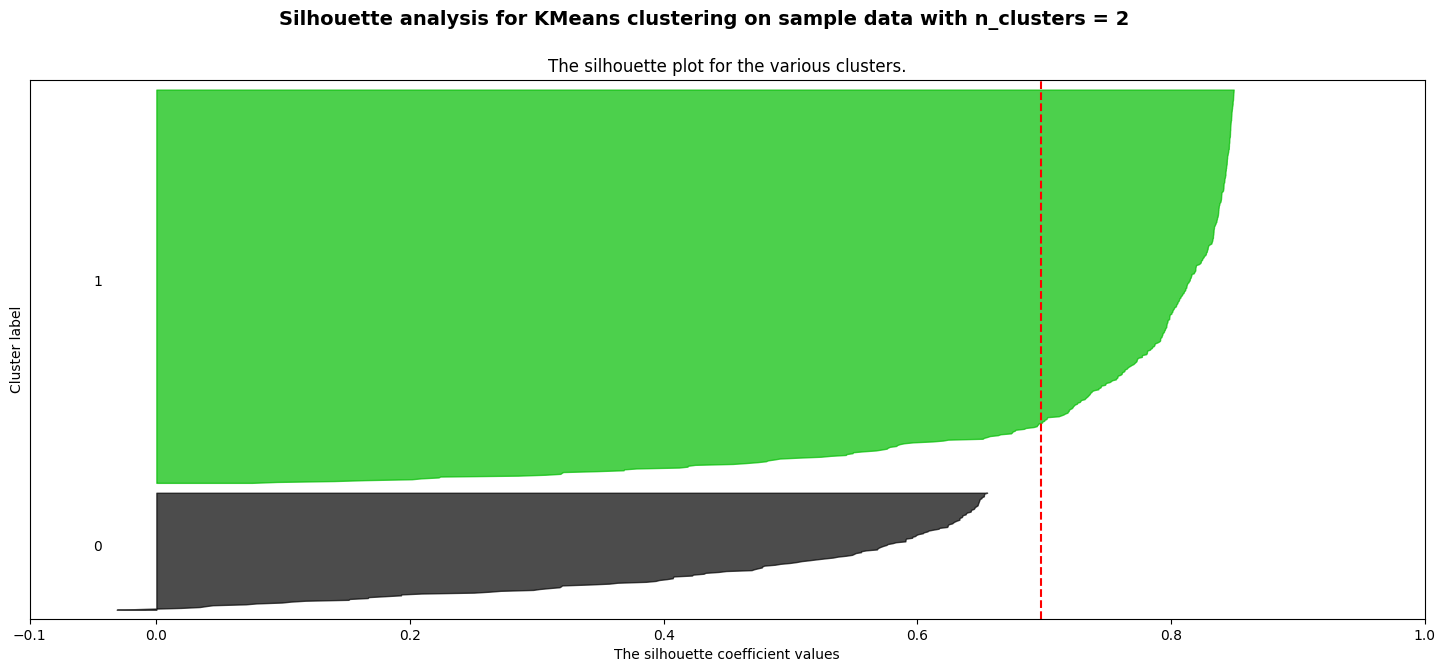

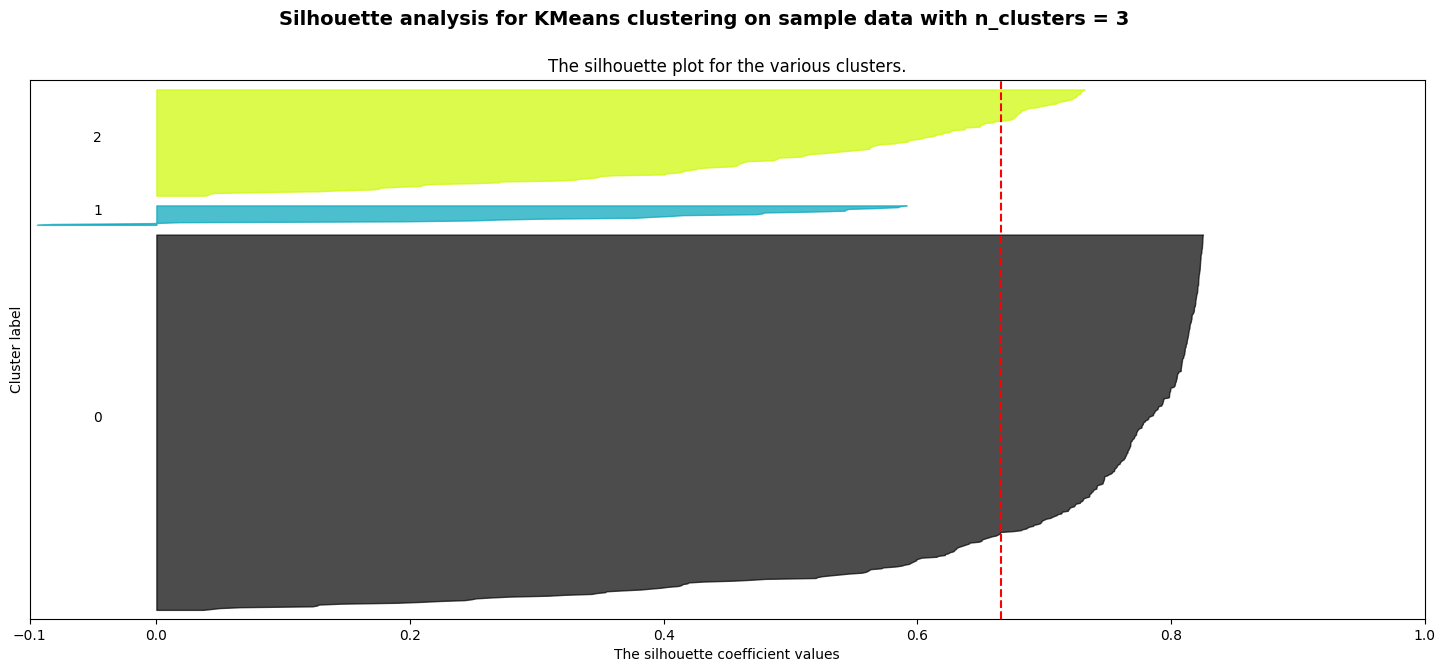

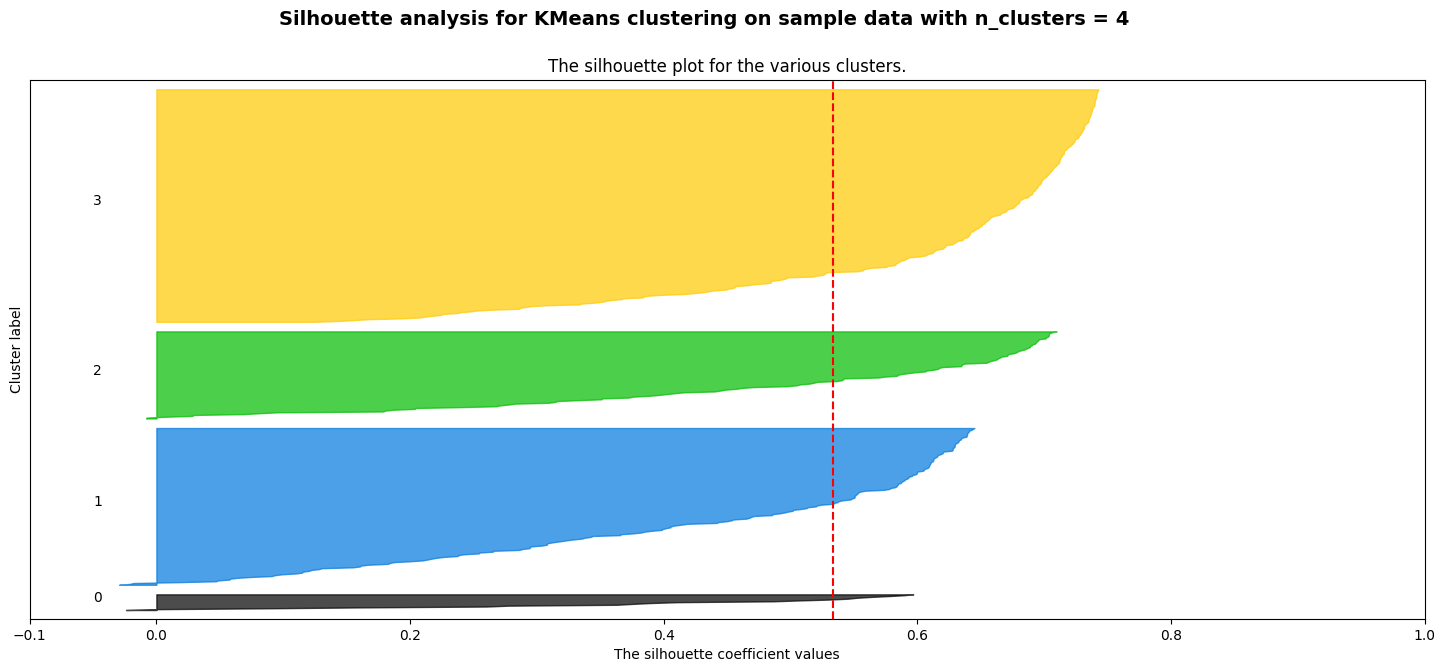

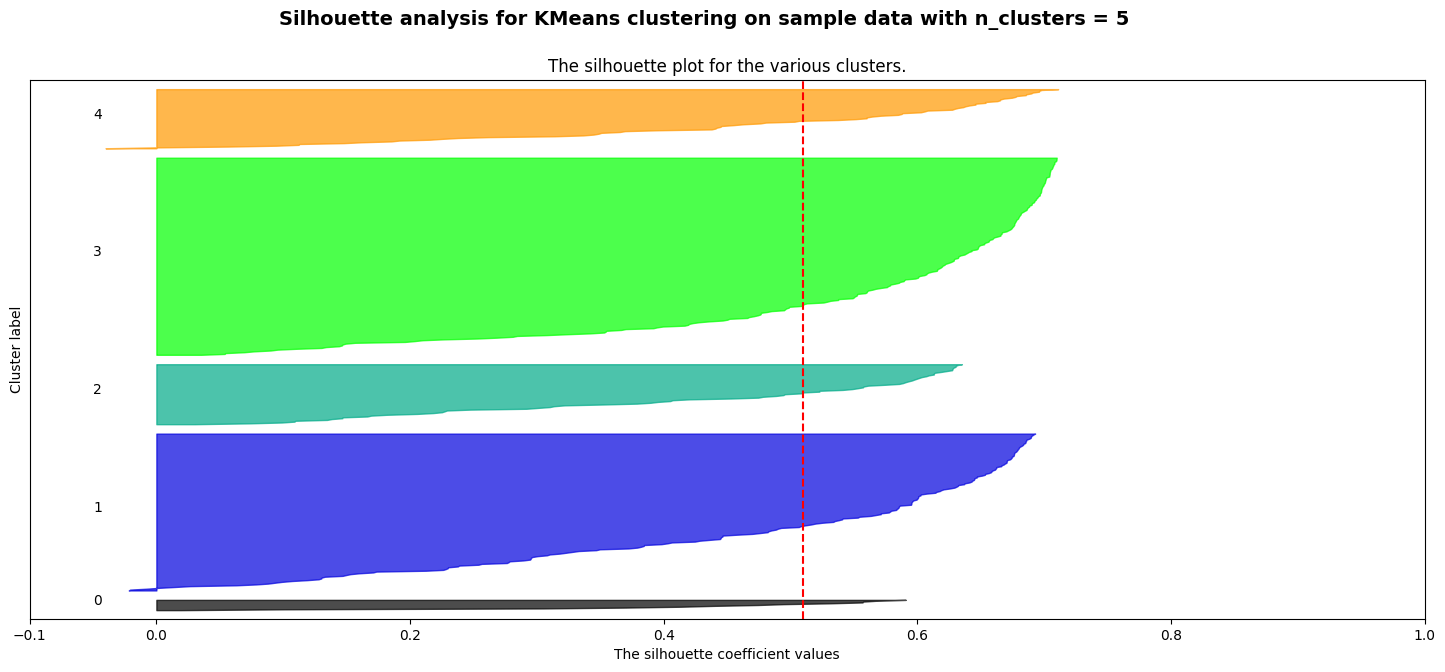

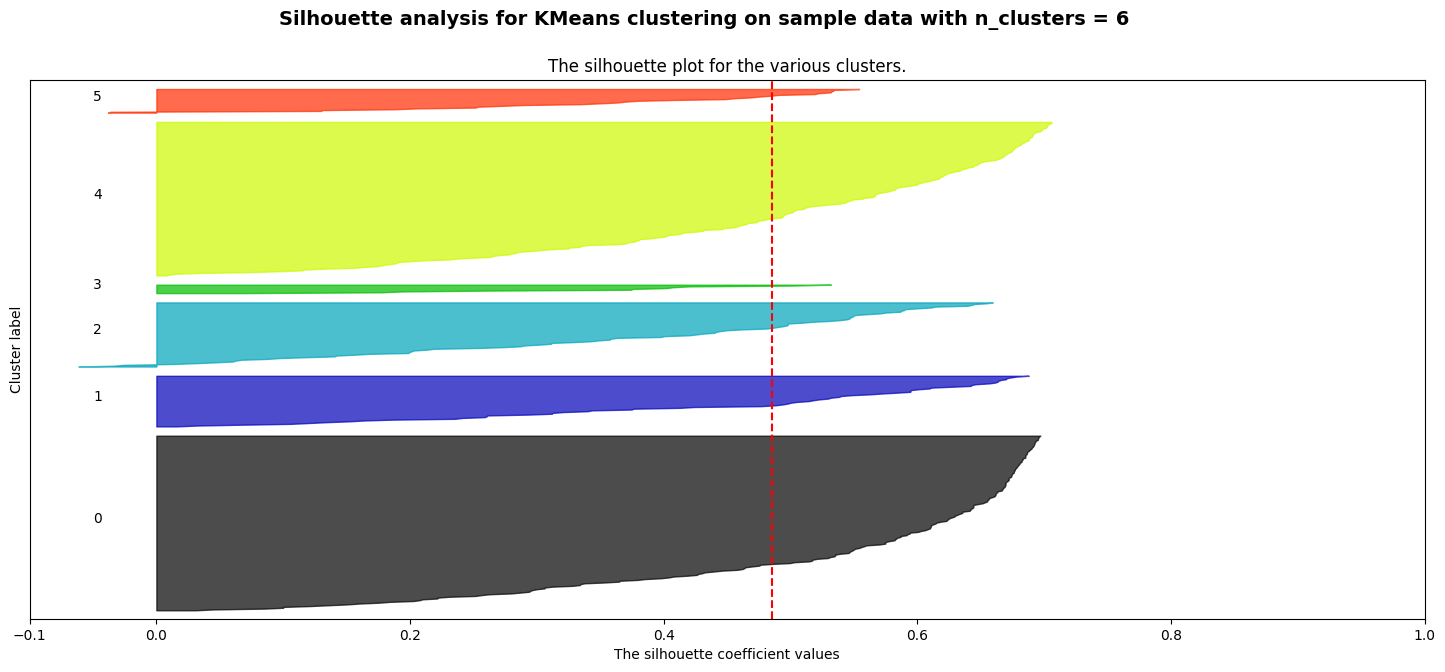

In [16]:
##Taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import fetch_openml


X, y = grab_breast_cancer_dataset()

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[np.where(cluster_labels == i)]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

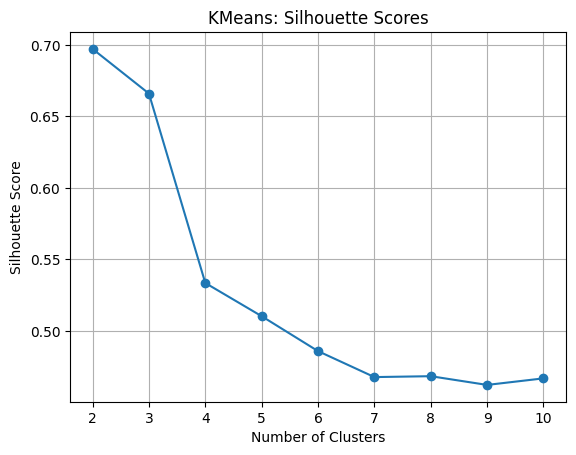

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml

X, _ = grab_breast_cancer_dataset()

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('KMeans: Silhouette Scores')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

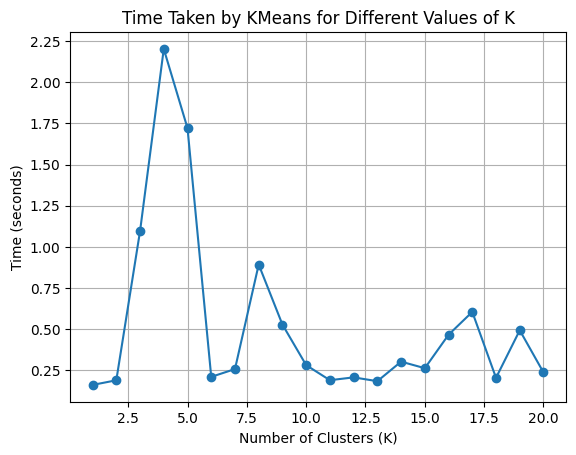

In [34]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate sample data or load your dataset
# Example: X = np.random.rand(1000, 2)  # 1000 samples with 2 features
X, _ = grab_breast_cancer_dataset()

# Initialize an array to store the time taken for each value of K
k_values = range(1, 21)  # Number of clusters from 1 to 10
times = []

# Iterate over different values of K
for k in k_values:
    start_time = time.time()
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

# Plot the time taken versus the number of clusters
plt.plot(k_values, times, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Time (seconds)')
plt.title('Breast Cancer: Time Taken by KMeans for Different Values of K')
plt.grid(True)
plt.show()


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import (
    mutual_info_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
)


X, true_y = grab_breast_cancer_dataset()
true_y = true_y.to_numpy().reshape(-1)

kmeans = KMeans(n_clusters=4, random_state=10)
cluster_labels = kmeans.fit_predict(X)


RI = rand_score(true_y, cluster_labels)
ARI = adjusted_rand_score(true_y, cluster_labels)

print(f"Rand Index: {RI}")
print(f"Adjusted Rand Score: {ARI}")

MI = mutual_info_score(true_y, cluster_labels)
NMI = normalized_mutual_info_score(true_y, cluster_labels)
AMI = adjusted_mutual_info_score(true_y, cluster_labels)

print(f"Mutual Information: {MI}")
print(f"Normalized Mutual Information: {NMI}")
print(f"Adjusted Mutual Information: {AMI}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Rand Index: 0.7009641327755638
Adjusted Rand Score: 0.4127431467179323
Mutual Information: 0.3797151288418405
Normalized Mutual Information: 0.4219864605977628
Adjusted Mutual Information: 0.42026450705233126


## Breast Cancer - Expected Maximization

For n_clusters = 2 The average silhouette_score is : 0.5315172918032405
For n_clusters = 3 The average silhouette_score is : 0.5171579600942848
For n_clusters = 4 The average silhouette_score is : 0.49691775183341197
For n_clusters = 5 The average silhouette_score is : 0.43043979963111195
For n_clusters = 6 The average silhouette_score is : 0.3975843352884274


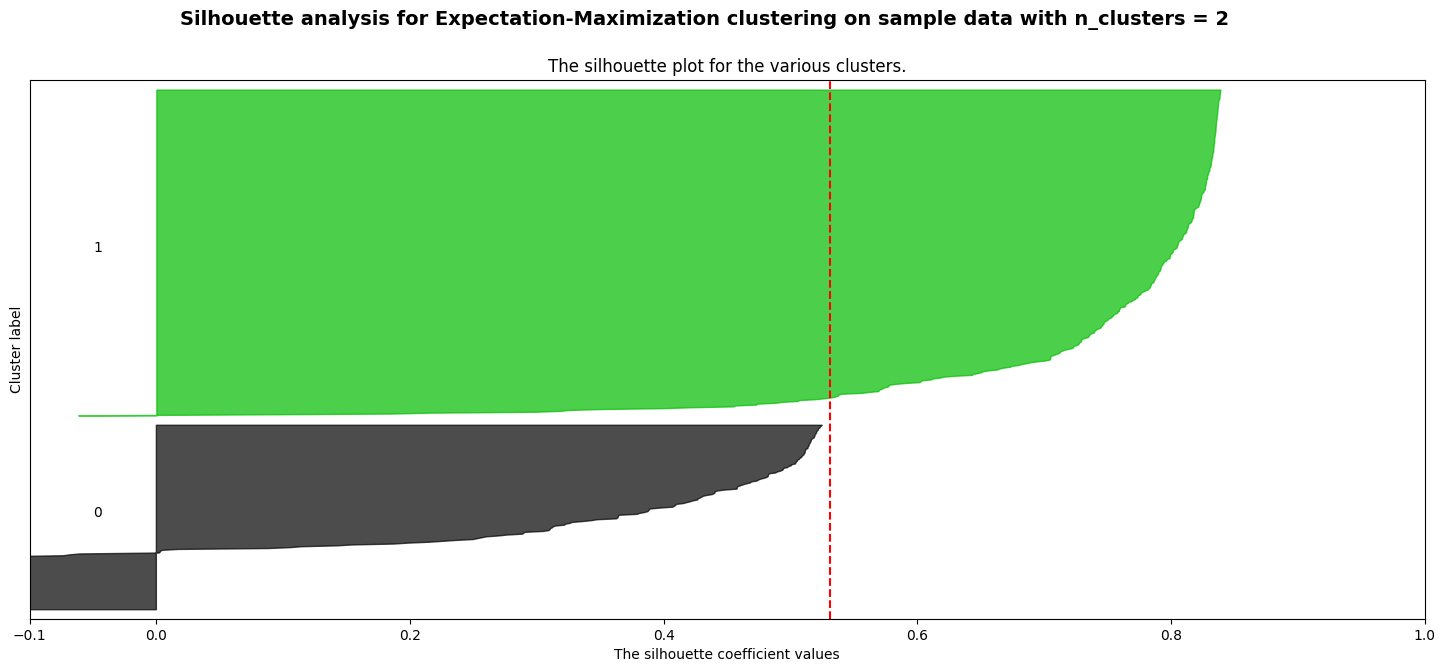

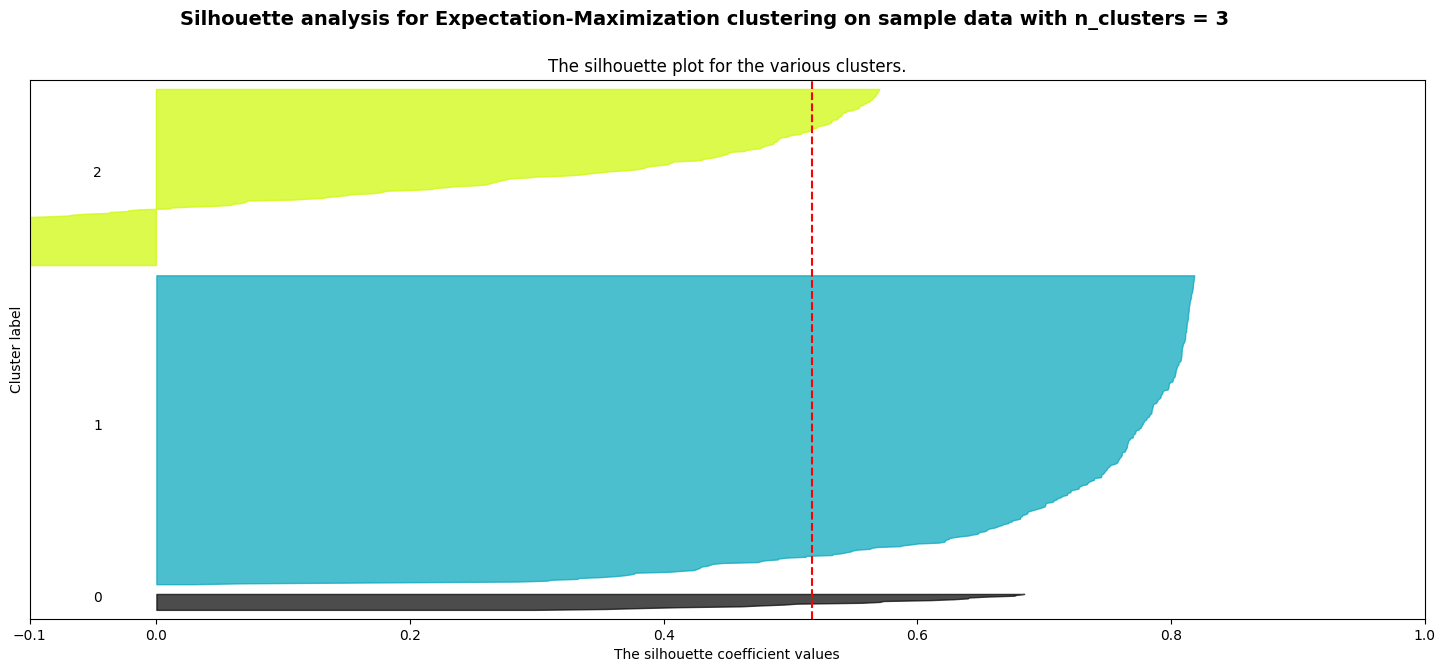

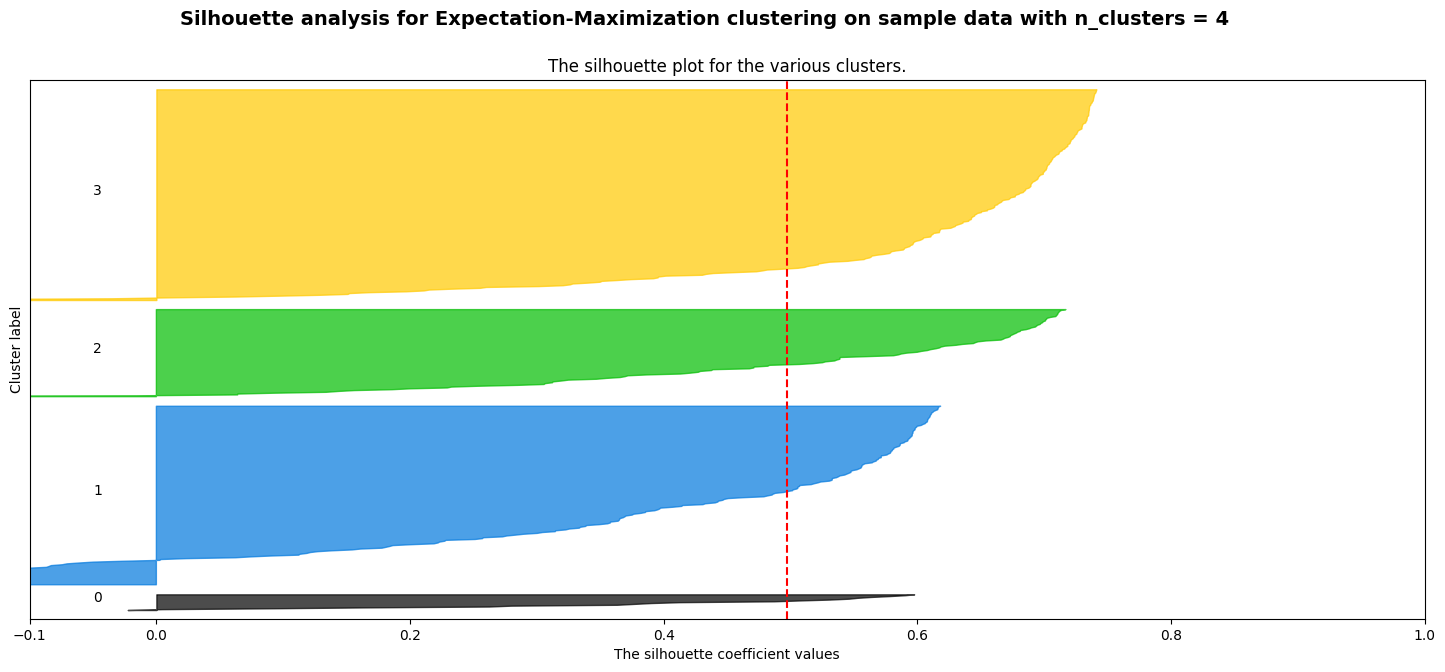

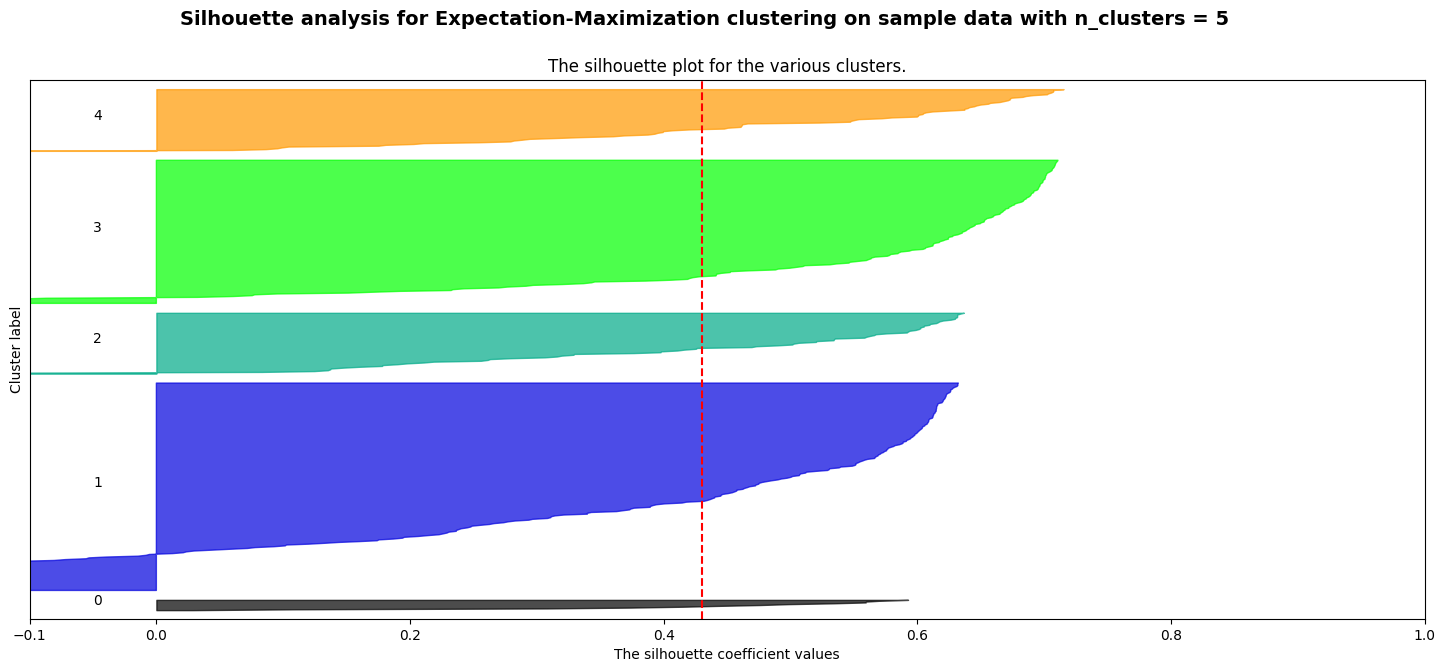

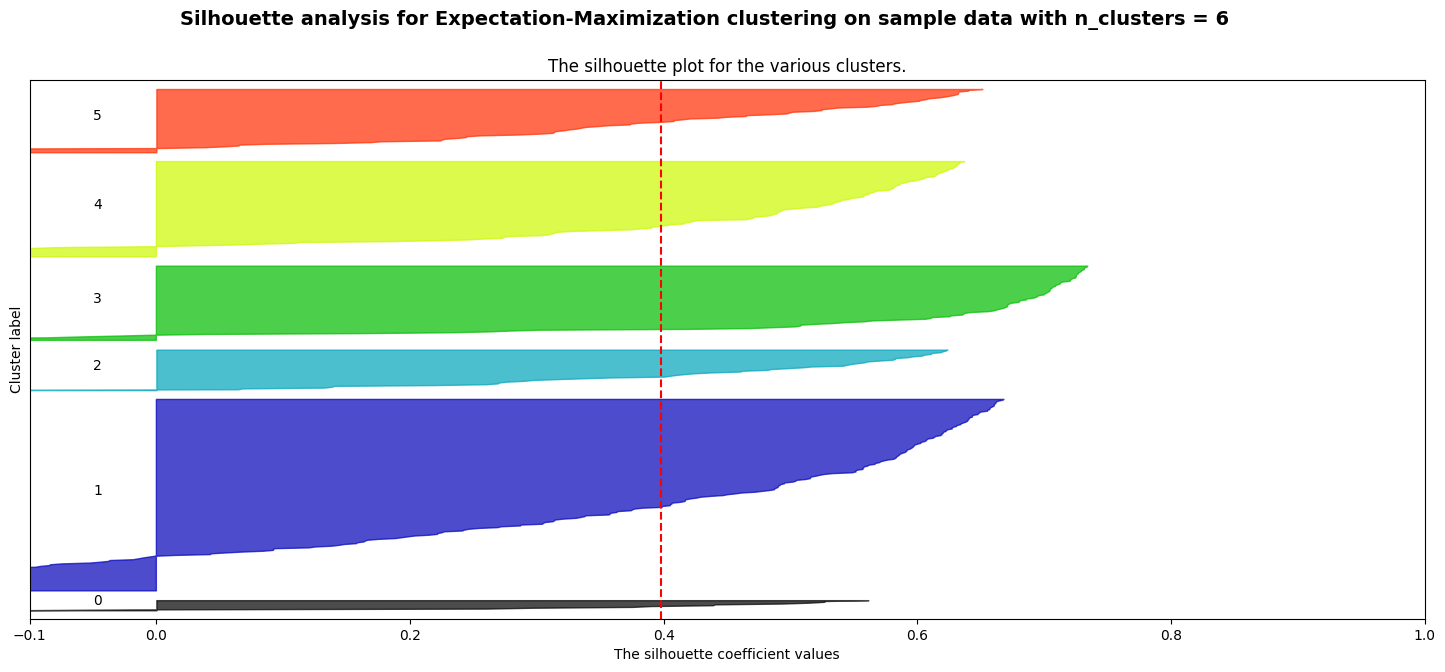

In [30]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import fetch_openml


X, y = grab_breast_cancer_dataset()

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[np.where(cluster_labels == i)]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for Expectation-Maximization clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


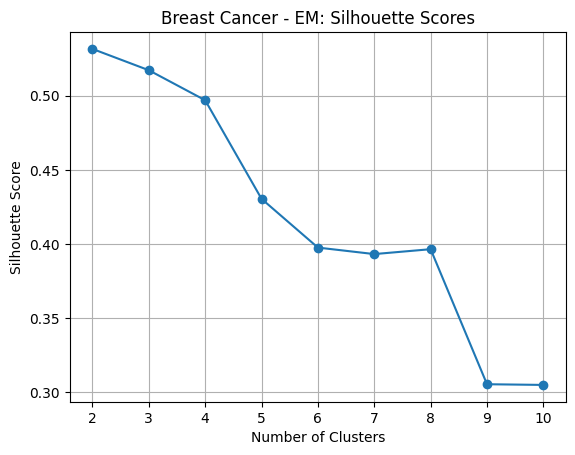

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml


X, _ = grab_breast_cancer_dataset()

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize Gaussian Mixture Model with current number of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = gmm.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Breast Cancer - EM: Silhouette Scores')
plt.grid(True)
plt.show()


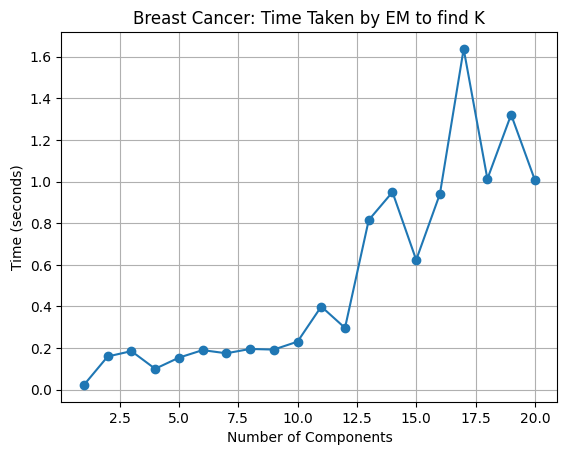

In [10]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate sample data or load your dataset
# Example: X = np.random.rand(1000, 2)  # 1000 samples with 2 features
X, _ = grab_breast_cancer_dataset()

# Initialize an array to store the time taken for each value of K
n_components_values = range(1, 21)  # Number of components from 1 to 10
times = []

# Iterate over different values of n_components
for n_components in n_components_values:
    start_time = time.time()
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

# Plot the time taken versus the number of components
plt.plot(n_components_values, times, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Time (seconds)')
plt.title('Breast Cancer: Time Taken by EM to find K')
plt.grid(True)
plt.show()


In [38]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import (
    mutual_info_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
)

X, true_y = grab_breast_cancer_dataset()
true_y = true_y.to_numpy().reshape(-1)

# Initialize Gaussian Mixture Model with desired number of clusters
em = GaussianMixture(n_components=2, random_state=10)

# Fit the model and predict cluster labels
cluster_labels = em.fit_predict(X)

# Calculate Rand Index and Adjusted Rand Score
RI = rand_score(true_y, cluster_labels)
ARI = adjusted_rand_score(true_y, cluster_labels)

print(f"Rand Index: {RI}")
print(f"Adjusted Rand Score: {ARI}")

# Calculate Mutual Information, Normalized Mutual Information, and Adjusted Mutual Information
MI = mutual_info_score(true_y, cluster_labels)
NMI = normalized_mutual_info_score(true_y, cluster_labels)
AMI = adjusted_mutual_info_score(true_y, cluster_labels)

print(f"Mutual Information: {MI}")
print(f"Normalized Mutual Information: {NMI}")
print(f"Adjusted Mutual Information: {AMI}")


Rand Index: 0.9062600559419788
Adjusted Rand Score: 0.811631803886236
Mutual Information: 0.46424163097175947
Normalized Mutual Information: 0.7061254214484894
Adjusted Mutual Information: 0.7057308428990033


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

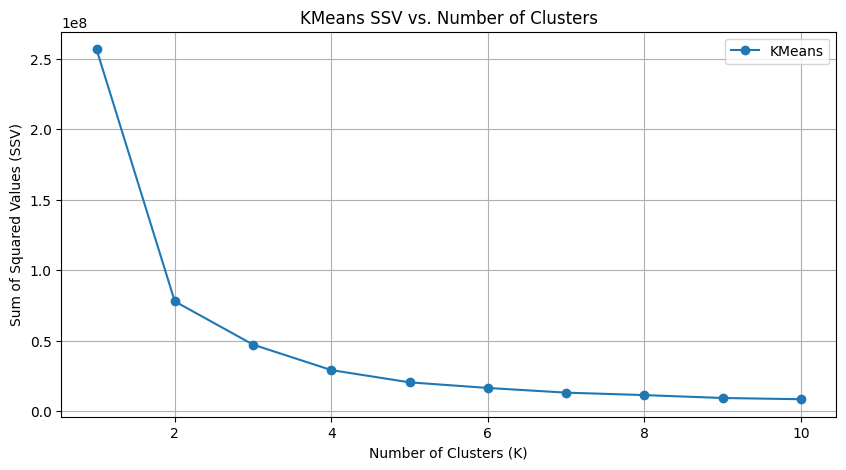

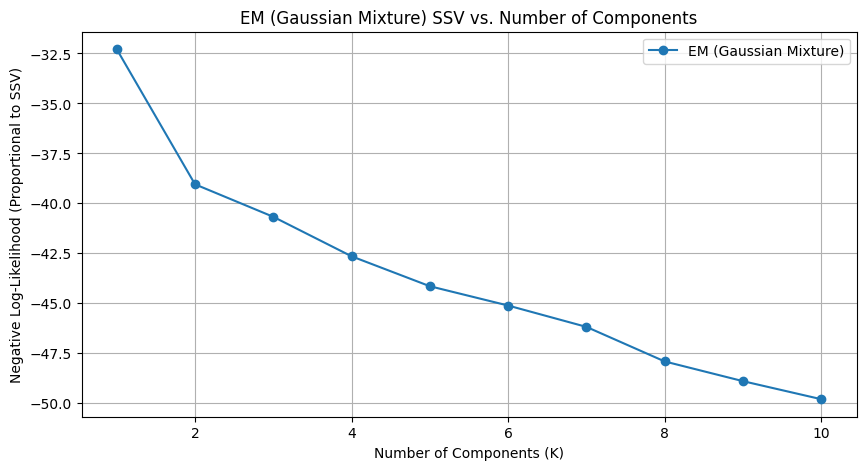

In [36]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data or load your dataset
# Example: X = np.random.rand(1000, 2)  # 1000 samples with 2 features

# Initialize arrays to store SSV and number of clusters
k_values = range(1, 11)  # Number of clusters from 1 to 10
ssv_kmeans = []
ssv_em = []

# Run KMeans and EM for different values of K
for k in k_values:
    # KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssv_kmeans.append(kmeans.inertia_)

    # EM (Gaussian Mixture)
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X)
    ssv_em.append(-gmm.score(X))  # EM's score method returns the negative log-likelihood, which is proportional to the SSV

# Plot for KMeans
plt.figure(figsize=(10, 5))
plt.plot(k_values, ssv_kmeans, marker='o', label='KMeans')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Values (SSV)')
plt.title('KMeans SSV vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Plot for EM (Gaussian Mixture)
plt.figure(figsize=(10, 5))
plt.plot(k_values, ssv_em, marker='o', label='EM (Gaussian Mixture)')
plt.xlabel('Number of Components (K)')
plt.ylabel('Negative Log-Likelihood (Proportional to SSV)')
plt.title('EM (Gaussian Mixture) SSV vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()



In [49]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Assuming X contains your dataset and y_true contains the true labels
X, y = grab_breast_cancer_dataset()
y_true = y.to_numpy().reshape(-1)

kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(X)

# Assuming y contains the true labels and y_pred contains the predicted cluster labels ('B' or 'M')

# Perform clustering with k=2 clusters (e.g., using KMeans)
# After clustering, you have the predicted cluster assignments in y_pred

# Initialize lists to store proportions of each class in each cluster
class_proportions_cluster0 = []
class_proportions_cluster1 = []

# Iterate over each class
for class_label in ['B', 'M']:
    # Get indices of data points belonging to the current class
    class_indices = np.where(y == class_label)[0]

    # Calculate proportion of data points in each cluster for the current class
    print(y_pred[class_indices])
    proportion_cluster0 = np.mean(y_pred[class_indices] == 1)
    proportion_cluster1 = np.mean(y_pred[class_indices] == 0)

    # Append proportions to the corresponding list
    class_proportions_cluster0.append(proportion_cluster0)
    class_proportions_cluster1.append(proportion_cluster1)

# Calculate label proportion agreement for each cluster
label_proportion_agreement_cluster0 = max(class_proportions_cluster0)
label_proportion_agreement_cluster1 = max(class_proportions_cluster1)

# Print or use label proportion agreement for analysis
print("Label Proportion Agreement for Cluster 0:", label_proportion_agreement_cluster0)
print("Label Proportion Agreement for Cluster 1:", label_proportion_agreement_cluster1)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0
 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1

In [52]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Assuming X contains your dataset and y_true contains the true labels
X, y = grab_breast_cancer_dataset()
y_true = y.to_numpy().reshape(-1)


em = GaussianMixture(n_components=2, random_state=10)
y_pred = em.fit_predict(X)

# Assuming y contains the true labels and y_pred contains the predicted cluster labels ('B' or 'M')

# Perform clustering with k=2 clusters (e.g., using KMeans)
# After clustering, you have the predicted cluster assignments in y_pred

# Initialize lists to store proportions of each class in each cluster
class_proportions_cluster0 = []
class_proportions_cluster1 = []

# Iterate over each class
for class_label in ['B', 'M']:
    # Get indices of data points belonging to the current class
    class_indices = np.where(y == class_label)[0]

    print(y_pred[class_indices])


    # Calculate proportion of data points in each cluster for the current class
    proportion_cluster0 = np.mean(y_pred[class_indices] == 1)
    proportion_cluster1 = np.mean(y_pred[class_indices] == 0)

    # Append proportions to the corresponding list
    class_proportions_cluster0.append(proportion_cluster0)
    class_proportions_cluster1.append(proportion_cluster1)

# Calculate label proportion agreement for each cluster
label_proportion_agreement_cluster0 = max(class_proportions_cluster0)
label_proportion_agreement_cluster1 = max(class_proportions_cluster1)

# Print or use label proportion agreement for analysis
print("Label Proportion Agreement for Cluster 0:", label_proportion_agreement_cluster0)
print("Label Proportion Agreement for Cluster 1:", label_proportion_agreement_cluster1)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0

In [50]:
# Assuming y contains the true labels ('B' for benign and 'M' for malignant)

# Count occurrences of each class
class_counts = {
    'B': np.sum(y == 'B'),
    'M': np.sum(y == 'M')
}

# Calculate proportions of each class
total_samples = len(y)
class_proportions = {label: count / total_samples for label, count in class_counts.items()}

# Print class counts and proportions
print("Class Counts:", class_counts)
print("Class Proportions:", class_proportions)


Class Counts: {'B': Diagnosis    357
dtype: int64, 'M': Diagnosis    212
dtype: int64}
Class Proportions: {'B': Diagnosis    0.627417
dtype: float64, 'M': Diagnosis    0.372583
dtype: float64}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

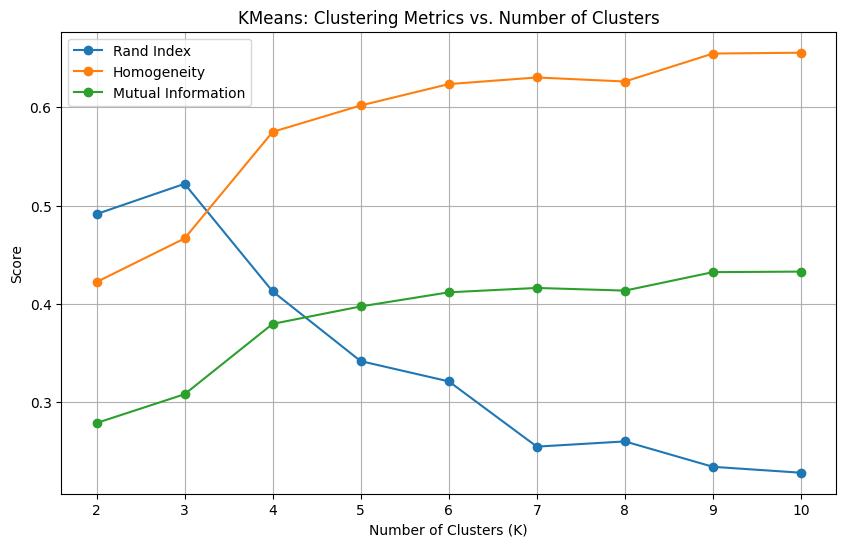

In [38]:
#Kmeans dataset

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, mutual_info_score
import matplotlib.pyplot as plt

X, y = grab_breast_cancer_dataset()
y = y.to_numpy().reshape(-1)

# Initialize arrays to store metric values
k_values = range(2, 11)  # Number of clusters from 2 to 10
rand_index_scores = []
homogeneity_scores = []
mutual_info_scores = []

# Compute metrics for different values of K
for k in k_values:
    # Perform clustering
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(X)  # X is your data

    # Compute metrics
    rand_index = adjusted_rand_score(y, cluster_labels)  # true_labels are the ground truth labels
    homogeneity = homogeneity_score(y, cluster_labels)
    mutual_info = mutual_info_score(y, cluster_labels)

    # Store metric values
    rand_index_scores.append(rand_index)
    homogeneity_scores.append(homogeneity)
    mutual_info_scores.append(mutual_info)

print(y, cluster_labels)

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(k_values, rand_index_scores, marker='o', label='Rand Index')
plt.plot(k_values, homogeneity_scores, marker='o', label='Homogeneity')
plt.plot(k_values, mutual_info_scores, marker='o', label='Mutual Information')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.title('KMeans: Clustering Metrics vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


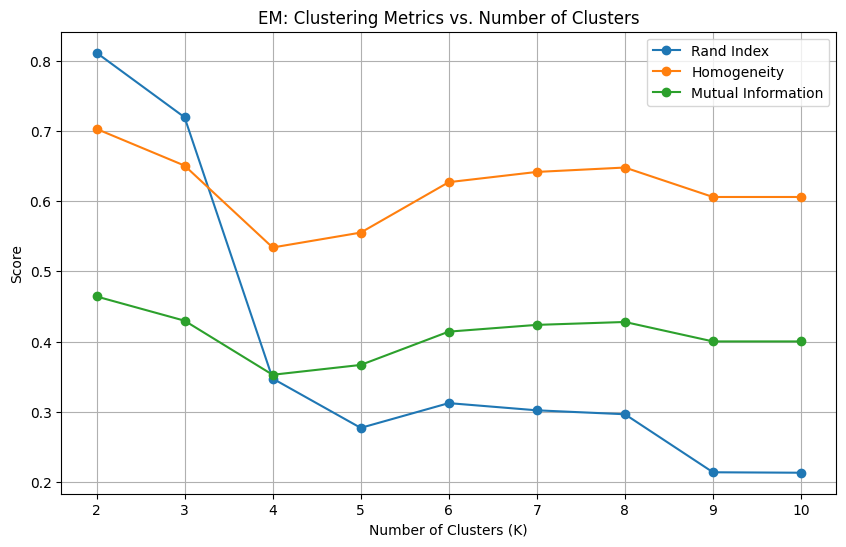

In [15]:
#Kmeans dataset

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, mutual_info_score
import matplotlib.pyplot as plt

X, y = grab_breast_cancer_dataset()
y = y.to_numpy().reshape(-1)

# Initialize arrays to store metric values
k_values = range(2, 11)  # Number of clusters from 2 to 10
rand_index_scores = []
homogeneity_scores = []
mutual_info_scores = []

# Compute metrics for different values of K
for k in k_values:
    # Perform clustering
    em = GaussianMixture(n_components=k, random_state=10)
    cluster_labels = em.fit_predict(X)

    # Compute metrics
    rand_index = adjusted_rand_score(y, cluster_labels)  # true_labels are the ground truth labels
    homogeneity = homogeneity_score(y, cluster_labels)
    mutual_info = mutual_info_score(y, cluster_labels)

    # Store metric values
    rand_index_scores.append(rand_index)
    homogeneity_scores.append(homogeneity)
    mutual_info_scores.append(mutual_info)

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(k_values, rand_index_scores, marker='o', label='Rand Index')
plt.plot(k_values, homogeneity_scores, marker='o', label='Homogeneity')
plt.plot(k_values, mutual_info_scores, marker='o', label='Mutual Information')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.title('EM: Clustering Metrics vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


Breast Cancer Dataset

KMeans:
Silhouette: 0.7
Rand Index: 0.7503774845912028
Adjusted Rand Score: 0.49142453622455523
Mutual Information: 0.2788454615572362
Normalized Mutual Information: 0.46479332792160793
Adjusted Mutual Information: 0.46400471284520867

Expected Maximization:
Silhouette: 0.55
Rand Index: 0.9062600559419788
Adjusted Rand Score: 0.811631803886236
Mutual Information: 0.46424163097175947
Normalized Mutual Information: 0.7061254214484894
Adjusted Mutual Information: 0.7057308428990033


KMeans has a higher silhouette score (0.7) compared to EM clustering (0.55). This indicates that, according to the silhouette metric, KMeans produces better-defined clusters with higher cohesion within clusters and better separation between clusters. Both KMeans and EM clustering have relatively lower Rand Index and Adjusted Rand Score compared to the ideal value of 1. This suggests that neither algorithm perfectly matches the true cluster assignments. However, EM clustering has higher Rand Index and Adjusted Rand Score values compared to KMeans, indicating better agreement with the true cluster assignments. Mutual Information measures the agreement between the true cluster assignments and the clustering results.  KMeans has lower MI, NMI, and AMI compared to EM clustering, suggesting that the clustering results are less consistent with the true labels. EM clustering shows higher MI, NMI, and AMI, indicating stronger agreement with true labels. While KMeans produces clusters with a higher silhouette score, indicating better-defined clusters according to that metric, EM clustering achieves better agreement with true cluster assignments based on Rand Index, Adjusted Rand Score, Mutual Information, Normalized Mutual Information, and Adjusted Mutual Information.The choice between KMeans and EM clustering may depend on the specific requirements of the application and the relative importance of different evaluation metrics. If better agreement with true cluster assignments is prioritized, EM clustering might be preferred despite its lower silhouette score.


## Adult Income - Expected Maximzation

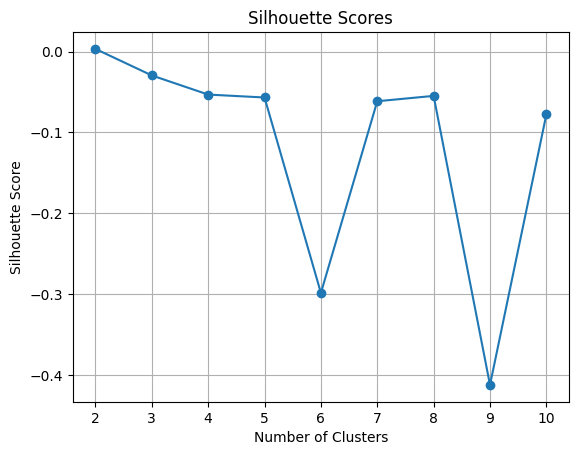

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml


X, _ = grab_adult_income_dataset()

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize Gaussian Mixture Model with current number of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = gmm.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('EM: Silhouette Scores')
plt.grid(True)
plt.show()


In [41]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import (
    mutual_info_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
)

X, true_y = grab_adult_income_dataset()
true_y = true_y.to_numpy().reshape(-1)

# Initialize Gaussian Mixture Model with desired number of clusters
em = GaussianMixture(n_components=2, random_state=10)

# Fit the model and predict cluster labels
cluster_labels = em.fit_predict(X)

# Calculate Rand Index and Adjusted Rand Score
RI = rand_score(true_y, cluster_labels)
ARI = adjusted_rand_score(true_y, cluster_labels)

print(f"Rand Index: {RI}")
print(f"Adjusted Rand Score: {ARI}")

# Calculate Mutual Information, Normalized Mutual Information, and Adjusted Mutual Information
MI = mutual_info_score(true_y, cluster_labels)
NMI = normalized_mutual_info_score(true_y, cluster_labels)
AMI = adjusted_mutual_info_score(true_y, cluster_labels)

print(f"Mutual Information: {MI}")
print(f"Normalized Mutual Information: {NMI}")
print(f"Adjusted Mutual Information: {AMI}")


Rand Index: 0.6570508296987786
Adjusted Rand Score: 0.19361585605323944
Mutual Information: 0.03956751130568262
Normalized Mutual Information: 0.08460272697311064
Adjusted Mutual Information: 0.08458268715331242


## Adult Income - KMeans Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

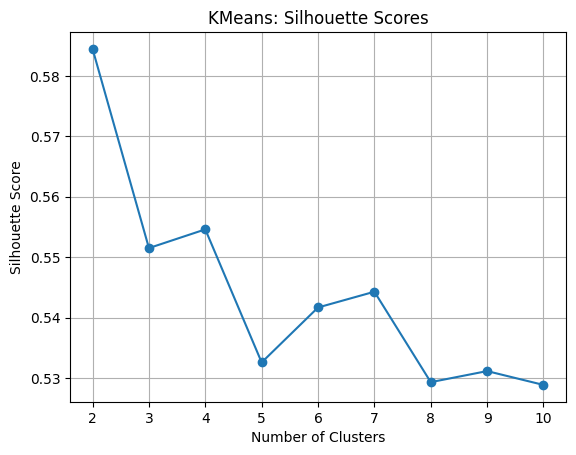

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml

X, _ = grab_adult_income_dataset()

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('KMeans: Silhouette Scores')
plt.grid(True)
plt.show()


In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.metrics import (
    mutual_info_score,
    normalized_mutual_info_score,
    adjusted_mutual_info_score,
)


X, true_y = grab_adult_income_dataset()
true_y = true_y.to_numpy().reshape(-1)

kmeans = KMeans(n_clusters=2, random_state=10)
cluster_labels = kmeans.fit_predict(X)


RI = rand_score(true_y, cluster_labels)
ARI = adjusted_rand_score(true_y, cluster_labels)

print(f"Rand Index: {RI}")
print(f"Adjusted Rand Score: {ARI}")

MI = mutual_info_score(true_y, cluster_labels)
NMI = normalized_mutual_info_score(true_y, cluster_labels)
AMI = adjusted_mutual_info_score(true_y, cluster_labels)

print(f"Mutual Information: {MI}")
print(f"Normalized Mutual Information: {NMI}")
print(f"Adjusted Mutual Information: {AMI}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Rand Index: 0.5287113909823258
Adjusted Rand Score: -0.0058373836184310145
Mutual Information: 0.00011141918974247322
Normalized Mutual Information: 0.00019846761650241316
Adjusted Mutual Information: 0.00018023470848059698


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

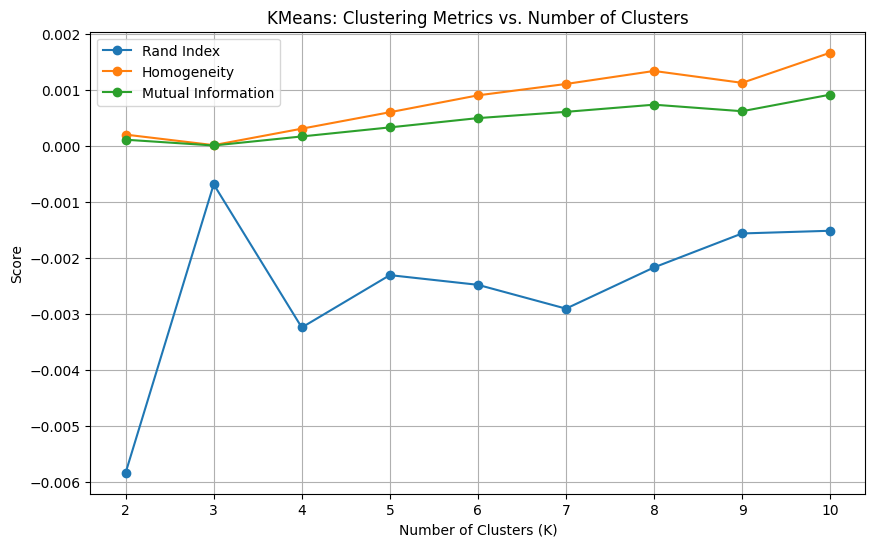

In [28]:
#Kmeans dataset

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, mutual_info_score
import matplotlib.pyplot as plt

X, y = grab_adult_income_dataset()
y = y.to_numpy().reshape(-1)

# Initialize arrays to store metric values
k_values = range(2, 11)  # Number of clusters from 2 to 10
rand_index_scores = []
homogeneity_scores = []
mutual_info_scores = []

# Compute metrics for different values of K
for k in k_values:
    # Perform clustering
    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(X)  # X is your data

    # Compute metrics
    rand_index = adjusted_rand_score(y, cluster_labels)  # true_labels are the ground truth labels
    homogeneity = homogeneity_score(y, cluster_labels)
    mutual_info = mutual_info_score(y, cluster_labels)

    # Store metric values
    rand_index_scores.append(rand_index)
    homogeneity_scores.append(homogeneity)
    mutual_info_scores.append(mutual_info)

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(k_values, rand_index_scores, marker='o', label='Rand Index')
plt.plot(k_values, homogeneity_scores, marker='o', label='Homogeneity')
plt.plot(k_values, mutual_info_scores, marker='o', label='Mutual Information')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.title('KMeans: Clustering Metrics vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


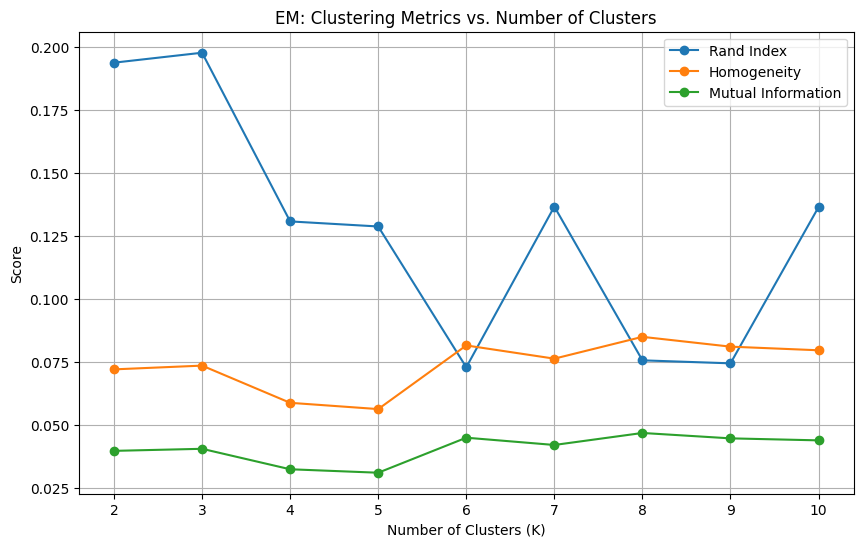

In [29]:
#Kmeans dataset

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, mutual_info_score
import matplotlib.pyplot as plt

X, y = grab_adult_income_dataset()
y = y.to_numpy().reshape(-1)

# Initialize arrays to store metric values
k_values = range(2, 11)  # Number of clusters from 2 to 10
rand_index_scores = []
homogeneity_scores = []
mutual_info_scores = []

# Compute metrics for different values of K
for k in k_values:
    # Perform clustering
    em = GaussianMixture(n_components=k, random_state=10)
    cluster_labels = em.fit_predict(X)

    # Compute metrics
    rand_index = adjusted_rand_score(y, cluster_labels)  # true_labels are the ground truth labels
    homogeneity = homogeneity_score(y, cluster_labels)
    mutual_info = mutual_info_score(y, cluster_labels)

    # Store metric values
    rand_index_scores.append(rand_index)
    homogeneity_scores.append(homogeneity)
    mutual_info_scores.append(mutual_info)

# Plot metrics
plt.figure(figsize=(10, 6))
plt.plot(k_values, rand_index_scores, marker='o', label='Rand Index')
plt.plot(k_values, homogeneity_scores, marker='o', label='Homogeneity')
plt.plot(k_values, mutual_info_scores, marker='o', label='Mutual Information')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.title('EM: Clustering Metrics vs. Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()


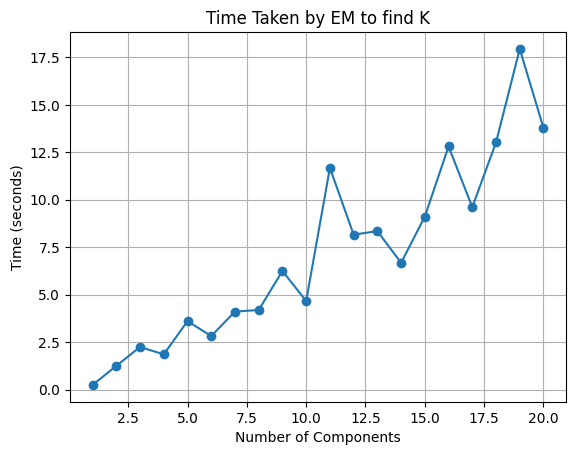

In [30]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate sample data or load your dataset
# Example: X = np.random.rand(1000, 2)  # 1000 samples with 2 features
X, _ = grab_adult_income_dataset()

# Initialize an array to store the time taken for each value of K
n_components_values = range(1, 21)  # Number of components from 1 to 10
times = []

# Iterate over different values of n_components
for n_components in n_components_values:
    start_time = time.time()
    gmm = GaussianMixture(n_components=n_components, random_state=10)
    gmm.fit(X)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

# Plot the time taken versus the number of components
plt.plot(n_components_values, times, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Time (seconds)')
plt.title('Time Taken by EM to find K')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

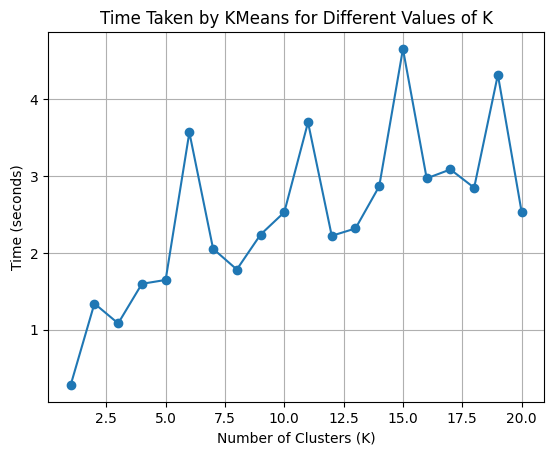

In [31]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate sample data or load your dataset
# Example: X = np.random.rand(1000, 2)  # 1000 samples with 2 features
X, _ = grab_adult_income_dataset()

# Initialize an array to store the time taken for each value of K
k_values = range(1, 21)  # Number of clusters from 1 to 10
times = []

# Iterate over different values of K
for k in k_values:
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

# Plot the time taken versus the number of clusters
plt.plot(k_values, times, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Time (seconds)')
plt.title('Time Taken by KMeans for Different Values of K')
plt.grid(True)
plt.show()


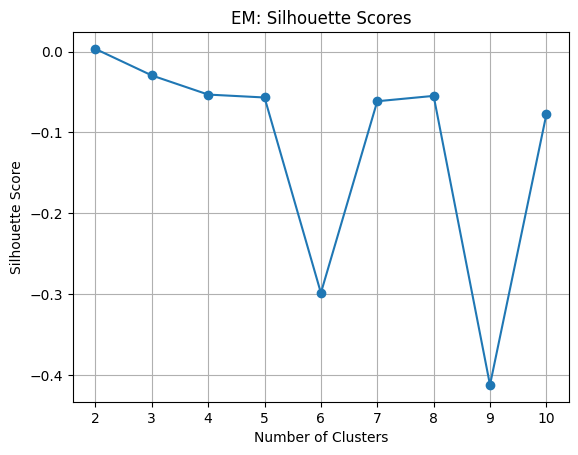

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_openml


X, _ = grab_adult_income_dataset()

# Define the range of clusters
range_n_clusters = range(2, 11)  # from 2 to 10 clusters

# Store silhouette scores
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    # Initialize Gaussian Mixture Model with current number of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=10)

    # Fit the model
    cluster_labels = gmm.fit_predict(X)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Append silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('EM: Silhouette Scores')
plt.grid(True)
plt.show()


Analysis on Adult Income Dataset

EM clustering outperforms KMeans clustering significantly in terms of Rand Index and Adjusted Rand Score, indicating better agreement with true labels.EM clustering achieves higher MI, NMI, and AMI values compared to KMeans clustering, indicating stronger agreement with true labels.A silhouette score of 0 for EM clustering implies that the clusters generated by the EM algorithm have no meaningful structure or are poorly separated.
Despite the higher Rand Index, Adjusted Rand Score, Mutual Information, Normalized Mutual Information, and Adjusted Mutual Information values achieved by EM clustering, the lack of a meaningful silhouette score suggests that the clusters may not be well-defined or separated.
KMeans clustering, despite having a lower Rand Index and Adjusted Rand Score, exhibits a non-zero silhouette score, indicating some level of separation between clusters.

In [56]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Assuming X contains your dataset and y_true contains the true labels
X, y = grab_adult_income_dataset()
y_true = y.to_numpy().reshape(-1)


gmm = GaussianMixture(n_components=2, random_state=10)

    # Fit the model
y_pred = gmm.fit_predict(X)

#kmeans = KMeans(n_clusters=2)
#y_pred = kmeans.fit_predict(X)

# Assuming y contains the true labels and y_pred contains the predicted cluster labels ('B' or 'M')

# Perform clustering with k=2 clusters (e.g., using KMeans)
# After clustering, you have the predicted cluster assignments in y_pred

# Initialize lists to store proportions of each class in each cluster
class_proportions_cluster0 = []
class_proportions_cluster1 = []

# Iterate over each class
for class_label in [0, 1]:
    # Get indices of data points belonging to the current class
    class_indices = np.where(y == class_label)[0]

    # Calculate proportion of data points in each cluster for the current class

    proportion_cluster0 = np.mean(y_pred[class_indices] == 0)
    proportion_cluster1 = np.mean(y_pred[class_indices] == 1)

    print("Proportion in Cluster 0:", proportion_cluster0)
    print("Proportion in Cluster 1:", proportion_cluster1)

    # Append proportions to the corresponding list
    class_proportions_cluster0.append(proportion_cluster0)
    class_proportions_cluster1.append(proportion_cluster1)

# Calculate label proportion agreement for each cluster
label_proportion_agreement_cluster0 = max(class_proportions_cluster0)
label_proportion_agreement_cluster1 = max(class_proportions_cluster1)

# Print or use label proportion agreement for analysis
print("Label Proportion Agreement for Cluster 0:", label_proportion_agreement_cluster0)
print("Label Proportion Agreement for Cluster 1:", label_proportion_agreement_cluster1)



Proportion in Cluster 0: 0.07218409366168753
Proportion in Cluster 1: 0.9278159063383125
Proportion in Cluster 0: 0.3110293488491486
Proportion in Cluster 1: 0.6889706511508513
Label Proportion Agreement for Cluster 0: 0.3110293488491486
Label Proportion Agreement for Cluster 1: 0.9278159063383125


## 2. Implement dimensionality reduction algorithms on two datasets

- PCA
- ICA
- Randomized Projections
- Manifold Learning Algorithm of Your Choice

Dimensionality Reduction refers to the process of reducing the number of random variables under consideration by obtaining a set of principal variables. This process helps lower overfitting by focusing on the most important features. It’s also easier to visualize.


Methods to Evaluate:
- Explained Variance Ratio
- Reconstruction Error
- General Performance


## Breast Cancer

### PCA -

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Explained Variance Ratio: [0.44272026 0.18971182]
Reconstruction Error: 0.3675679234844056


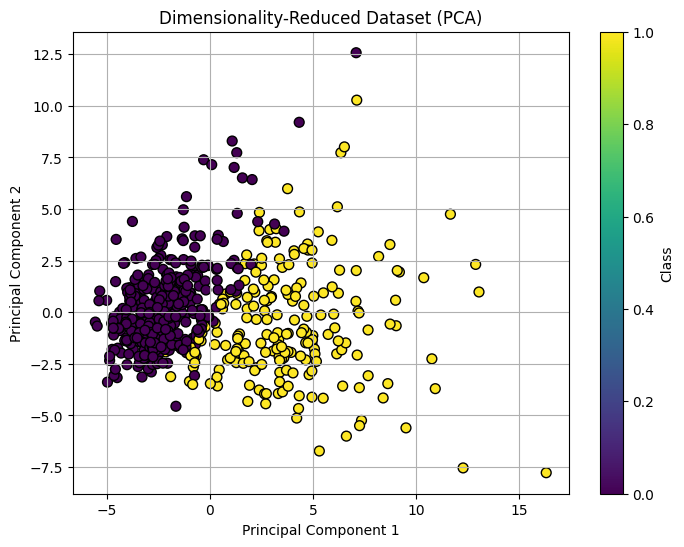

Original data shape: (569, 30)
Transformed data shape after PCA: (569, 2)
Number of features reduced: 28


In [24]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

X,y = grab_breast_cancer_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Encode class labels as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Reconstruction Error
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print("Reconstruction Error:", reconstruction_error)

# General Performance (e.g., clustering performance or visualization)
# For demonstration purposes, you can print the reduced data
# Plot the reduced dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', edgecolor='k', s=50)
plt.title('Dimensionality-Reduced Dataset (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

print("Original data shape:", X.shape)
print("Transformed data shape after PCA:", X_pca.shape)
print("Number of features reduced:", X.shape[1] - X_pca.shape[1])


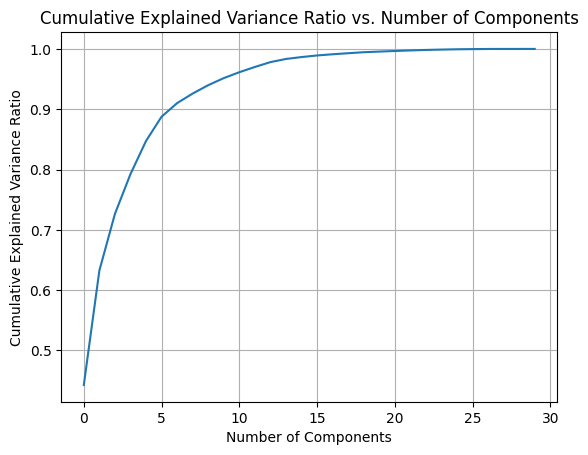

In [28]:
# Calculate explained variance ratio for different numbers of components
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()


### ICA

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Reconstruction Error: 0.36756792348440553


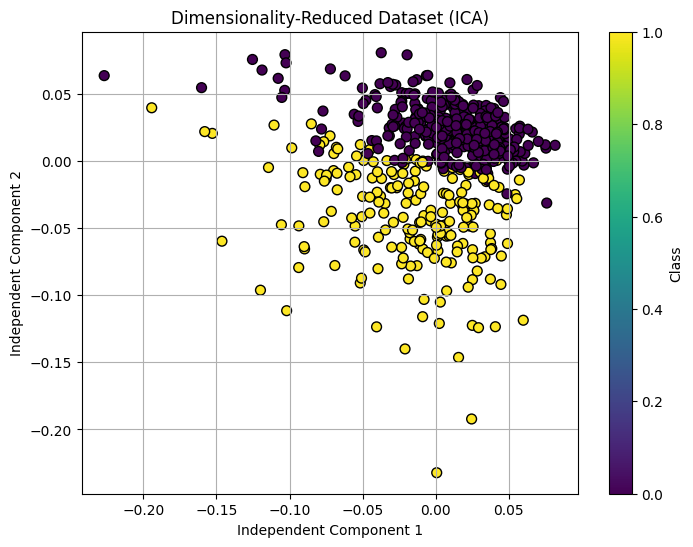

Original data shape: (569, 30)
Transformed data shape after PCA: (569, 2)
Number of features reduced: 28


In [25]:
from sklearn.decomposition import FastICA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


# Load the breast cancer dataset
X, y = grab_breast_cancer_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Independent Component Analysis (ICA) for dimensionality reduction
ica = FastICA(n_components=2, random_state=42)  # Specify the number of components to keep
X_ica = ica.fit_transform(X_scaled)

# Calculate Reconstruction Error
X_reconstructed = ica.inverse_transform(X_ica)
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print("Reconstruction Error:", reconstruction_error)


# Encode class labels as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Plot the reduced dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y_encoded, cmap='viridis', edgecolor='k', s=50)
plt.title('Dimensionality-Reduced Dataset (ICA)')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

print("Original data shape:", X.shape)
print("Transformed data shape after PCA:", X_ica.shape)
print("Number of features reduced:", X.shape[1] - X_ica.shape[1])


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whi

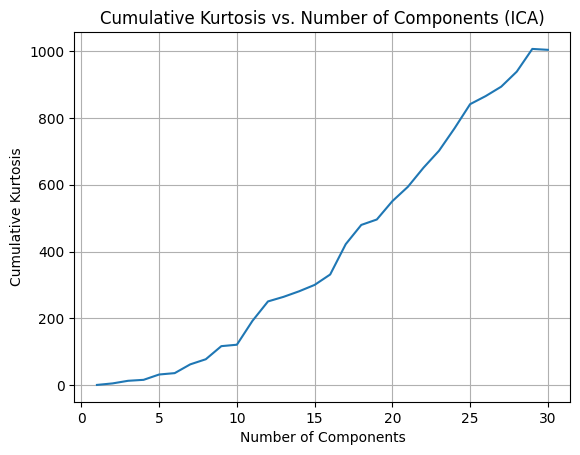

In [30]:
from sklearn.decomposition import FastICA
from scipy import stats


# Initialize ICA with different numbers of components
n_components_range = range(1, X.shape[1] + 1)
cumulative_kurtosis = []

for n_components in n_components_range:
    ica = FastICA(n_components=n_components, random_state=42)
    X_ica = ica.fit_transform(X_scaled)
    # Calculate kurtosis for each independent component and sum it up
    kurtosis_sum = np.sum(np.abs(stats.kurtosis(X_ica, axis=0)))
    cumulative_kurtosis.append(kurtosis_sum)

# Plot cumulative kurtosis
plt.plot(n_components_range, cumulative_kurtosis)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Kurtosis')
plt.title('Cumulative Kurtosis vs. Number of Components (ICA)')
plt.grid(True)
plt.show()


For Independent Component Analysis (ICA), there isn't an "explained variance ratio" similar to PCA. ICA aims to find statistically independent components rather than maximizing variance.

However, you can still plot some measure of cumulative explained variance ratio for ICA, but it wouldn't directly correspond to the explained variance ratio in PCA. Instead, you might plot something like the cumulative kurtosis, which measures the non-Gaussianity of the independent components.

This plot can give you an idea of how much non-Gaussianity (independence) is captured by adding more components in ICA. However, it's important to note that there isn't a direct equivalent to explained variance ratio in PCA for ICA.



If the cumulative kurtosis continues to increase steadily without leveling off, you may need to consider a larger number of components.

### Randomized Projection

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Explained Variance Ratio: [0.47807135 0.32420821]
Reconstruction Error: 0.9363697844635744


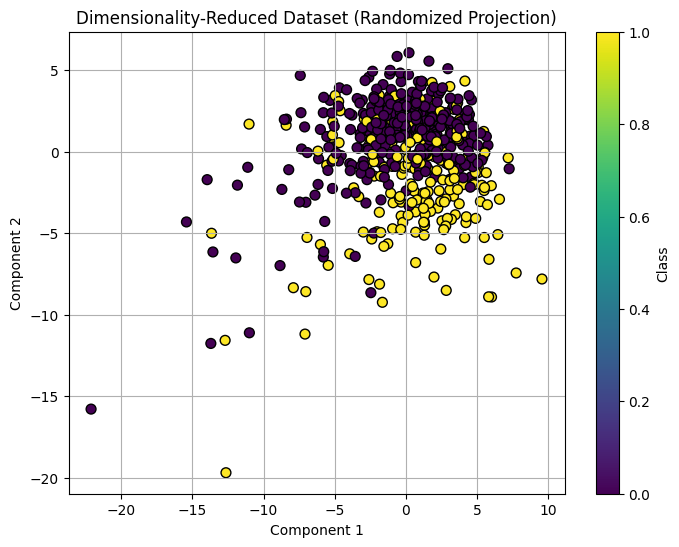

Original data shape: (569, 30)
Transformed data shape after PCA: (569, 2)
Number of features reduced: 28


In [26]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the breast cancer dataset
X, y = grab_breast_cancer_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Randomized Projection for dimensionality reduction
rp = GaussianRandomProjection(n_components=2, random_state=42)  # Specify the number of components to keep
X_rp = rp.fit_transform(X_scaled)

# Encode class labels as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print explained variance ratio
explained_variance_ratio = np.var(X_rp, axis=0) / np.var(X_scaled, axis=0).sum()
print("Explained Variance Ratio:", explained_variance_ratio)

# Calculate Reconstruction Error
X_reconstructed = rp.inverse_transform(X_rp)
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print("Reconstruction Error:", reconstruction_error)

# Plot the reduced dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=y_encoded, cmap='viridis', edgecolor='k', s=50)
plt.title('Dimensionality-Reduced Dataset (Randomized Projection)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

print("Original data shape:", X.shape)
print("Transformed data shape after PCA:", X_rp.shape)
print("Number of features reduced:", X.shape[1] - X_rp.shape[1])


### Isomap

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Explained Variance Ratio: [1.80343737 0.61883315]
Reconstruction Error: 1.184161769934818


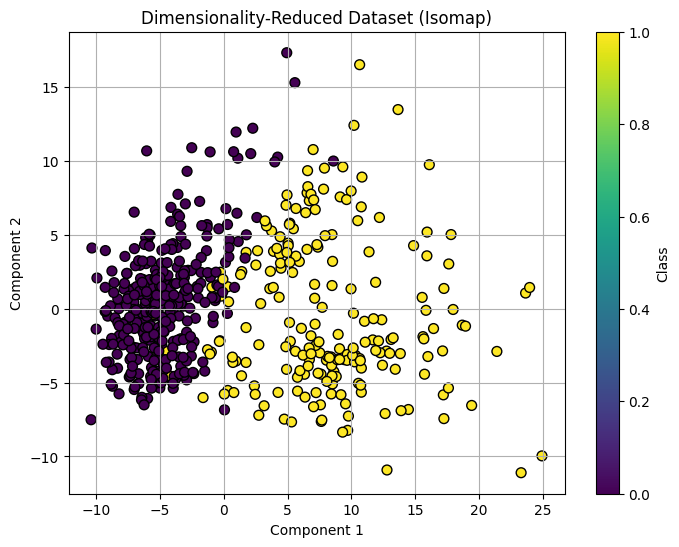

Original data shape: (569, 30)
Transformed data shape after PCA: (569, 2)
Number of features reduced: 28


In [27]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# Load the breast cancer dataset (replace with your dataset loading code)
X, y = grab_breast_cancer_dataset()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode class labels as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply Isomap for dimensionality reduction
isomap = Isomap(n_components=2)  # Specify the number of components to keep
X_iso = isomap.fit_transform(X_scaled)

# Print explained variance ratio
explained_variance_ratio = np.var(X_iso, axis=0) / np.var(X_scaled, axis=0).sum()
print("Explained Variance Ratio:", explained_variance_ratio)

# Calculate Reconstruction Error
X_reconstructed = rp.inverse_transform(X_iso)
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print("Reconstruction Error:", reconstruction_error)


# Plot the reduced dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y_encoded, cmap='viridis', edgecolor='k', s=50)
plt.title('Dimensionality-Reduced Dataset (Isomap)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

print("Original data shape:", X.shape)
print("Transformed data shape after PCA:", X_iso.shape)
print("Number of features reduced:", X.shape[1] - X_iso.shape[1])


### Analysis



## Adult Income

### PCA

### ICA

### Randomized Projection

### Isomap